In [6]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows',1000)

In [7]:
#Read in merged paint data file
df = pd.read_csv('Paint_Data_Merged.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(30)

metric  value                 time  is_prod  count
0   E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
1   E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2   E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
3   E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
4   E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
5   E_C100  110.0  2022-04-15 05:00:00      0.0    0.0
6   E_C100  100.0  2022-04-15 06:00:00      0.0    0.0
7   E_C100  110.0  2022-04-15 07:00:00      0.0    0.0
8   E_C100  110.0  2022-04-15 08:00:00      0.0    0.0
9   E_C100  110.0  2022-04-15 09:00:00      0.0    0.0
10  E_C100  110.0  2022-04-15 10:00:00      0.0    0.0
11  E_C100  110.0  2022-04-15 11:00:00      0.0    0.0
12  E_C100  120.0  2022-04-15 12:00:00      0.0    0.0
13  E_C100  120.0  2022-04-15 13:00:00      0.0    0.0
14  E_C100  110.0  2022-04-15 14:00:00      0.0    0.0
15  E_C100  120.0  2022-04-15 15:00:00      0.0    0.0
16  E_C100  120.0  2022-04-15 16:00:00      0.0    0.0
17  E_C100  110.0  2022-04-15 17:00:00      0.0    0.0
18  E_C100  110.0  2022-04-15 18:00:00      0.0    0.0
19  E_C100  120.0  2022-04-15 19:00:00      0.0    0.0
20  E_C100  130.0  2022-04-15 20:00:00      0.0    0.0
21  E_C100  120.0  2022-04-15 21:00:00      0.0    0.0
22  E_C100  110.0  2022-04-15 22:00:00      0.0    0.0
23  E_C100  120.0  2022-04-15 23:00:00      0.0    0.0
24  E_C100  120.0  2022-04-16 00:00:00      0.0    0.0
25  E_C100  120.0  2022-04-16 01:00:00      0.0    0.0
26  E_C100  110.0  2022-04-16 02:00:00      0.0    0.0
27  E_C100  120.0  2022-04-16 03:00:00      0.0    0.0
28  E_C100  120.0  2022-04-16 04:00:00      0.0    0.0
29  E_C100  120.0  2022-04-16 05:00:00      0.0    0.0

In [8]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')

In [9]:
df['metric'].unique()

array(['E_C100', 'E_C1000', 'E_C1100', 'E_C1200', 'E_C200', 'E_C300',
       'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800'], dtype=object)

In [10]:
meters = ['E_C100', 'E_C200', 'E_C300', 'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800']

In [11]:
def df_to_X_y_multivar(df, X_start = [], y_start = [], window_size = 10):
    df_as_np= df.to_numpy()
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return X, y 

In [12]:
df

metric  value                 time  is_prod  count
time                                                                   
2022-04-15 00:00:00  E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
2022-04-15 01:00:00  E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2022-04-15 02:00:00  E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
2022-04-15 03:00:00  E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
2022-04-15 04:00:00  E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
...                     ...    ...                  ...      ...    ...
2022-06-29 06:00:00  E_C800  300.0  2022-06-29 06:00:00      0.0   63.0
2022-06-29 07:00:00  E_C800  310.0  2022-06-29 07:00:00      1.0   71.0
2022-06-29 08:00:00  E_C800  300.0  2022-06-29 08:00:00      1.0   56.0
2022-06-29 09:00:00  E_C800  300.0  2022-06-29 09:00:00      1.0   75.0
2022-06-29 10:00:00  E_C800  300.0  2022-06-29 10:00:00      1.0   27.0

[19921 rows x 5 columns]

In [13]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(df['value'])

In [14]:
usage_df = df

usage_df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df['Day sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Day cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Year sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/year))
usage_df['Year cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/year))

usage_df = usage_df.drop(['Seconds'], axis =1)
usage_df = usage_df.loc[usage_df['metric'].isin(meters)]

usage_df = pd.get_dummies(usage_df, columns=['metric'])
usage_df = usage_df.drop(['time'], axis = 1)

In [15]:
usage_df

value  is_prod  count       Day sin       Day cos  \
time                                                                     
2022-04-15 00:00:00  390.0      0.0    0.0 -1.271365e-11  1.000000e+00   
2022-04-15 01:00:00  120.0      0.0    0.0  2.588190e-01  9.659258e-01   
2022-04-15 02:00:00  120.0      0.0    0.0  5.000000e-01  8.660254e-01   
2022-04-15 03:00:00  120.0      0.0    0.0  7.071068e-01  7.071068e-01   
2022-04-15 04:00:00  110.0      0.0    0.0  8.660254e-01  5.000000e-01   
...                    ...      ...    ...           ...           ...   
2022-06-29 06:00:00  300.0      0.0   63.0  1.000000e+00  1.302874e-11   
2022-06-29 07:00:00  310.0      1.0   71.0  9.659258e-01 -2.588190e-01   
2022-06-29 08:00:00  300.0      1.0   56.0  8.660254e-01 -5.000000e-01   
2022-06-29 09:00:00  300.0      1.0   75.0  7.071068e-01 -7.071068e-01   
2022-06-29 10:00:00  300.0      1.0   27.0  5.000000e-01 -8.660254e-01   

                     Year sin  Year cos  metric_E_C100  metric_E_C200  \
time                                                                    
2022-04-15 00:00:00  0.974794 -0.223108              1              0   
2022-04-15 01:00:00  0.974634 -0.223807              1              0   
2022-04-15 02:00:00  0.974473 -0.224505              1              0   
2022-04-15 03:00:00  0.974312 -0.225204              1              0   
2022-04-15 04:00:00  0.974150 -0.225902              1              0   
...                       ...       ...            ...            ...   
2022-06-29 06:00:00  0.051263 -0.998685              0              0   
2022-06-29 07:00:00  0.050547 -0.998722              0              0   
2022-06-29 08:00:00  0.049832 -0.998758              0              0   
2022-06-29 09:00:00  0.049116 -0.998793              0              0   
2022-06-29 10:00:00  0.048400 -0.998828              0              0   

                     metric_E_C300  metric_E_C400  metric_E_C500  \
time                                                               
2022-04-15 00:00:00              0              0              0   
2022-04-15 01:00:00              0              0              0   
2022-04-15 02:00:00              0              0              0   
2022-04-15 03:00:00              0              0              0   
2022-04-15 04:00:00              0              0              0   
...                            ...            ...            ...   
2022-06-29 06:00:00              0              0              0   
2022-06-29 07:00:00              0              0              0   
2022-06-29 08:00:00              0              0              0   
2022-06-29 09:00:00              0              0              0   
2022-06-29 10:00:00              0              0              0   

                     metric_E_C600  metric_E_C700  metric_E_C800  
time                                                              
2022-04-15 00:00:00              0              0              0  
2022-04-15 01:00:00              0              0              0  
2022-04-15 02:00:00              0              0              0  
2022-04-15 03:00:00              0              0              0  
2022-04-15 04:00:00              0              0              0  
...                            ...            ...            ...  
2022-06-29 06:00:00              0              0              1  
2022-06-29 07:00:00              0              0              1  
2022-06-29 08:00:00              0              0              1  
2022-06-29 09:00:00              0              0              1  
2022-06-29 10:00:00              0              0              1  

[14488 rows x 15 columns]

In [16]:
metric_cols = ['metric_E_C100','metric_E_C200','metric_E_C300','metric_E_C400','metric_E_C500','metric_E_C600','metric_E_C700','metric_E_C800']
WINDOW_SIZE= 24
X = []
y = []

for meter in metric_cols:
    df_subset = usage_df.loc[usage_df[meter]==1].copy()
    
    X, y= df_to_X_y_multivar(df_subset, X, y, WINDOW_SIZE) 

    print(len(X))
X = np.array(X)
y = np.array(y)

    

1787
3574
5361
7148
8935
10722
12509
14296


In [17]:
#Split arrays into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

usage_training_mean = np.mean(X_train[:,:,0])
usage_training_std = np.std(X_train[:,:,0])

print('mean: ',usage_training_mean )
print('std: ',usage_training_std )

def preprocess(X_temp):
    X_temp[:,:,0] = (X_temp[:,:,0] - usage_training_mean) / usage_training_std
    return X_temp

def preprocess_output(y_temp):
    y_temp = (y_temp - usage_training_mean) / usage_training_std
    return y_temp

def postprocess_output(y_temp):
    y_temp = (y_temp* usage_training_std ) + usage_training_mean
    return y_temp


pp_X_train = preprocess(X_train)
pp_y_train = preprocess_output(y_train)

pp_X_test = preprocess(X_test)
pp_y_test = preprocess_output(y_test)

mean:  361.1588040690218
std:  299.8906283956299


In [18]:
usage_training_mean

361.1588040690218

In [19]:
 
test = np.array([1060, 1040, 1040])    


test = preprocess_output(test)


(test* usage_training_std ) + usage_training_mean

array([1060., 1040., 1040.])

<h1>Model</h1>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#model2 = Sequential()
#model2.add(InputLayer((WINDOW_SIZE, 15)))
#model2.add(GRU(64))
#model2.add(Dense(8,'relu'))
#model2.add(Dense(1,'linear'))

#model2.summary()



model = Sequential()
model.add(GRU(64, return_sequences=True, activation='swish', input_shape=(WINDOW_SIZE, 15)))
model.add(GRU(128, return_sequences=True, activation='swish'))
model.add(GRU(64, return_sequences=False, activation='swish'))
#Add dense layer
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 64)            15552     
                                                                 
 gru_1 (GRU)                 (None, 24, 128)           74496     
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 133,569
Trainable params: 133,569
Non-trai

In [21]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [22]:
model.fit(pp_X_train, pp_y_train, validation_data=(pp_X_test, pp_y_test), epochs=(15))

Epoch 1/15
358/358 [==============================] - 57s 122ms/step - loss: 0.1994 - root_mean_squared_error: 0.4465 - val_loss: 0.1068 - val_root_mean_squared_error: 0.3268
Epoch 2/15
358/358 [==============================] - 41s 116ms/step - loss: 0.0853 - root_mean_squared_error: 0.2920 - val_loss: 0.0965 - val_root_mean_squared_error: 0.3106
Epoch 3/15
358/358 [==============================] - 42s 118ms/step - loss: 0.0798 - root_mean_squared_error: 0.2824 - val_loss: 0.0850 - val_root_mean_squared_error: 0.2915
Epoch 4/15
358/358 [==============================] - 43s 119ms/step - loss: 0.0741 - root_mean_squared_error: 0.2722 - val_loss: 0.0832 - val_root_mean_squared_error: 0.2885
Epoch 5/15
358/358 [==============================] - 42s 118ms/step - loss: 0.0700 - root_mean_squared_error: 0.2646 - val_loss: 0.0753 - val_root_mean_squared_error: 0.2744
Epoch 6/15
358/358 [==============================] - 43s 119ms/step - loss: 0.0662 - root_mean_squared_error: 0.2574 - val_l

In [23]:
pp_X_test.shape

(2860, 24, 15)

In [24]:
test_predictions = model.predict(pp_X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':postprocess_output(test_predictions), 'Actuals': y_test})
test_results.head(100)

90/90 [==============================] - 5s 32ms/step


Test Predictions  Actuals
0         514.729004    670.0
1         230.396408    310.0
2         205.292664    160.0
3         772.734619    770.0
4         670.649597    680.0
5         103.142914     50.0
6         457.744995    450.0
7         698.744263    710.0
8         804.016663    900.0
9         165.238724     40.0
10         41.577698     20.0
11         35.541992     30.0
12        539.010864    590.0
13        428.699829    470.0
14        692.762573    690.0
15        660.338867    600.0
16        304.935211    210.0
17        229.355499    270.0
18        500.159363    600.0
19        966.371765   1080.0
20        293.856873    300.0
21        269.459595    250.0
22        464.070160    430.0
23        652.772217    630.0
24        484.870819    450.0
25        894.218506    950.0
26        198.740234    160.0
27        280.934326    280.0
28         18.260834     10.0
29        778.387756    790.0
30        201.505692    270.0
31        299.798950    740.0
32          7.428223     10.0
33          3.825348     10.0
34        614.862732    650.0
35        340.435028    240.0
36        223.945709    220.0
37         22.564301     90.0
38        737.934570    760.0
39        131.191086    130.0
40        111.760941    120.0
41         15.038452     30.0
42          3.074646     10.0
43        618.785706    680.0
44        362.681824    480.0
45        744.078491    740.0
46        465.276672    440.0
47        290.371857    310.0
48        517.605469    470.0
49        306.935303    310.0
50         -1.936829     10.0
51        349.039856    340.0
52        287.335815    310.0
53        319.933044    320.0
54       1011.503479   1070.0
55        191.772400    260.0
56        278.643555    280.0
57        646.298950    680.0
58        249.828033    270.0
59         43.978973     60.0
60          1.743042     20.0
61        145.540070    300.0
62        268.152618    650.0
63        614.715820    540.0
64        321.966522     40.0
65        754.506592    770.0
66        574.636597    640.0
67         77.339966    160.0
68        137.703766    130.0
69        298.314148    310.0
70        626.701538    720.0
71        118.372177    120.0
72        637.793701    660.0
73          5.353973     10.0
74        285.643982    310.0
75        311.466583    210.0
76        659.770508    670.0
77         47.090668      0.0
78        157.470566    160.0
79        119.199097    130.0
80        224.642166    290.0
81         13.921906     10.0
82        181.227509      0.0
83        175.097427     70.0
84        635.109375    640.0
85        242.254517    210.0
86        302.033844    320.0
87        301.747711      0.0
88        314.934448    310.0
89        288.482605    470.0
90        314.785278    250.0
91        301.337006    360.0
92        628.307861    640.0
93         56.004150     30.0
94        124.747879    120.0
95        731.372314    780.0
96        554.809937    480.0
97         47.416687     60.0
98        118.597183    130.0
99        254.460571    210.0

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, postprocess_output(test_predictions), squared=False)

84.49278167934972

In [26]:
test_predictions

array([ 0.5120872 , -0.43603367, -0.5197433 , ..., -0.42580795,
       -0.33876178, -1.1518072 ], dtype=float32)

In [27]:
train_predictions = model.predict(preprocess(X)).flatten()
train_results=pd.DataFrame(data={'Train Predictions':postprocess_output(train_predictions), 'Actuals': y})
train_results.head(100)

447/447 [==============================] - 14s 32ms/step


Train Predictions  Actuals
0          102.247620    120.0
1          100.024048    120.0
2          102.664276    110.0
3           90.549408    120.0
4          103.336426    120.0
5          102.038727    120.0
6          108.967697    130.0
7          129.081390    150.0
8          154.272461    160.0
9          158.859100    160.0
10         157.442963    160.0
11         158.488953    150.0
12         142.119781    150.0
13         148.359909    150.0
14         144.964355    130.0
15         123.959137    130.0
16         134.438782    120.0
17         123.559296    120.0
18         127.785843    130.0
19         130.861237    130.0
20         124.594543    130.0
21         119.240189    130.0
22         113.092850    130.0
23         109.857086    130.0
24         109.422272    120.0
25         100.939911    130.0
26         116.984665    130.0
27         113.423370    130.0
28         112.359940    130.0
29         113.690475    120.0
30         107.391098    130.0
31         131.605896    120.0
32         114.758530    120.0
33         125.958603    130.0
34         137.944763    130.0
35         131.715134    130.0
36         132.850845    120.0
37         119.171371    120.0
38         123.105942    120.0
39         122.060989    120.0
40         124.913483    120.0
41         127.713455    120.0
42         127.517349    120.0
43         124.157578    130.0
44         127.027283    130.0
45         118.933212    130.0
46         114.258041    130.0
47         110.251709    130.0
48         109.987152    130.0
49         112.425903    130.0
50         115.166428    130.0
51         115.508347    130.0
52         112.873810    130.0
53         113.685715    130.0
54         120.939957    120.0
55         114.360352    130.0
56         136.867142    140.0
57         143.759796    130.0
58         127.643997    130.0
59         136.182358    340.0
60         455.104309    480.0
61         514.818970    480.0
62         517.258057    470.0
63         459.118042    480.0
64         459.211273    470.0
65         458.599976    580.0
66         541.623474    550.0
67         476.903442    560.0
68         467.283447    550.0
69         436.966888    570.0
70         458.767212    540.0
71         416.611664    420.0
72         320.541504    310.0
73         341.771484    330.0
74         415.805450    420.0
75         565.415894    610.0
76         668.730225    570.0
77         627.196594    720.0
78         820.694092    840.0
79         884.692078    950.0
80         983.111328    980.0
81         933.718262   1050.0
82        1000.282471   1090.0
83         980.404785   1070.0
84         970.013794   1030.0
85         982.453491   1090.0
86         979.859619   1070.0
87         905.085571    950.0
88         911.377808    990.0
89         988.898254   1100.0
90        1020.688599   1080.0
91         975.842041   1090.0
92         993.467468   1060.0
93        1000.324890   1100.0
94         965.980652   1090.0
95        1008.595459   1090.0
96         938.191223   1000.0
97         684.159790    780.0
98         567.495605    390.0
99         304.935211    210.0

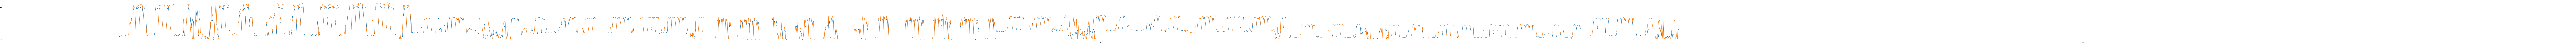

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(900,15))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

<h1>Validation Set and Bootstrapping</h1>

In [29]:
WINDOW_SIZE = 24


df_val = pd.read_csv('Val_Paint_Data_Merged.csv')
df_val = df_val.drop(['Unnamed: 0'], axis=1)
df_val.index = pd.to_datetime(df_val['time'], format='%Y.%m.%d %H:%M:%S')
df_val.head(30)

usage_df_val = df_val

usage_df_val['Seconds'] = df_val.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df_val['Day sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Day cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Year sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/year))
usage_df_val['Year cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/year))

usage_df_val = usage_df_val.drop(['Seconds'], axis =1)
usage_df_val = usage_df_val.loc[usage_df_val['metric'].isin(meters)]

#make dummy variables for the values in column 'metric'
usage_df_val = pd.get_dummies(usage_df_val, columns=['metric'])
#Drop 'time' column
usage_df_val = usage_df_val.drop(['time'], axis = 1)

preds = []
acts = []

start_point = 100

for i in range(24*7):
    bootstrap_x = np.expand_dims(usage_df_val.to_numpy()[i + start_point :i + start_point + WINDOW_SIZE], 0)
    #print(bootstrap_x)
    pred_y = postprocess_output(model.predict(preprocess(bootstrap_x)))[0][0]
    act_y = usage_df_val.to_numpy()[start_point + i+WINDOW_SIZE][0]
    usage_df_val.iloc[start_point + i+WINDOW_SIZE, 0] = pred_y
    
    preds.append(pred_y)
    acts.append(act_y)
    
    
    #print(pred_y)
    #print(act_y)
    #print('--------')

1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 70ms/step


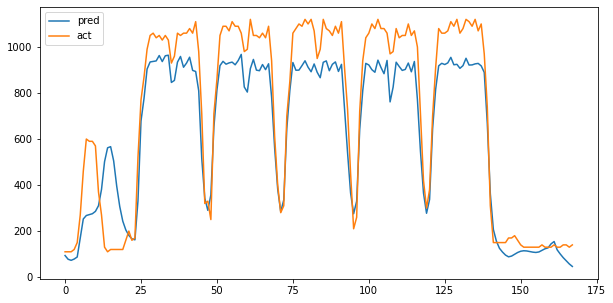

In [30]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")


In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(acts, preds, squared=False)

148.11162089775735

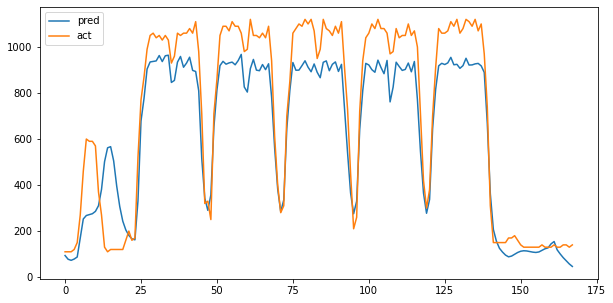

In [32]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")
